In [86]:
%matplotlib inline

# Dependencies and Setup
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import plotly.plotly as py
#import plotly.graph_objs as go

In [97]:
# Load Hurricane Data
hurricanes = "resources/Hurricane_data_all.csv"

# Read the Hurricane CSV files
hurricanes = pd.read_csv(hurricanes)

# Load Index data
sp1500 = "resources/S&P1500_Sector_All.csv"
#comm_services = "resources/Communication_Services.csv"
#cons_discrete = "resources/Consumer_Discretionary.csv"
#cons_staple = "resources/Consumer_Staples.csv"
#energy = "resources/Energy.csv"
#fin = "resources/Financials.csv"
#hlth_care = "resources/Health_Care.csv"
#i_t = "resources/Info_Technology.csv"
#materials = "resources/Materials.csv"
#real_estate = "resources/Real_Estate.csv"
#industrial = "resources/Industrials.csv"
#utilities = "resources/Utilities.csv"

# Read the Index CSV files
sp1500 = pd.read_csv(sp1500)
#comm_services = pd.read_csv(comm_services)
#cons_discrete = pd.read_csv(cons_discrete)   
#cons_staple = pd.read_csv(cons_staple)
#energy = pd.read_csv(energy)
#fin  = pd.read_csv(fin)
#hlth_care  = pd.read_csv(hlth_care)
#i_t = pd.read_csv(i_t)
#materials = pd.read_csv(materials)
#real_estate = pd.read_csv(real_estate)
#industrial = pd.read_csv(industrial)
#utilities  = pd.read_csv(utilities)

In [98]:
sp1500['Date'] = pd.to_datetime(sp1500['Date'])
sp1500.head(2)

,Date,(INDEX) S&P Composite 1500 / Consumer Discretionary - SEC - Total Return,(INDEX) S&P Composite 1500 / Communication Services -SEC - Total Return,(INDEX) S&P Composite 1500 / Consumer Staples - SEC - Total Return,(INDEX) S&P Composite 1500 / Energy - SEC - Total Return,(INDEX) S&P Composite 1500 / Financials - SEC - Total Return,(INDEX) S&P Composite 1500 / Health Care - SEC - Total Return,(INDEX) S&P Composite 1500 / Industrials - SEC - Total Return,(INDEX) S&P Composite 1500 / Information Technology - SEC - Total Return,(INDEX) S&P Composite 1500 / Materials - SEC - Total Return,(INDEX) S&P Composite 1500 Real Estate - SEC - Total Return,(INDEX) S&P Composite 1500 / Utilities - SEC - Total Return
0,2013-12-30,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1,2013-12-31,0.37,-0.08,-0.03,0.92,0.34,0.0,0.43,0.71,0.26,-0.49,0.23


In [99]:
sp1500_2017 = sp1500[(sp1500['Date'] >= '1/1/2017') & (sp1500['Date'] <= '12/31/2017')]
sp1500_2017 = sp1500_2017.reset_index(drop=True)
sp1500_2017.head(2)

,Date,(INDEX) S&P Composite 1500 / Consumer Discretionary - SEC - Total Return,(INDEX) S&P Composite 1500 / Communication Services -SEC - Total Return,(INDEX) S&P Composite 1500 / Consumer Staples - SEC - Total Return,(INDEX) S&P Composite 1500 / Energy - SEC - Total Return,(INDEX) S&P Composite 1500 / Financials - SEC - Total Return,(INDEX) S&P Composite 1500 / Health Care - SEC - Total Return,(INDEX) S&P Composite 1500 / Industrials - SEC - Total Return,(INDEX) S&P Composite 1500 / Information Technology - SEC - Total Return,(INDEX) S&P Composite 1500 / Materials - SEC - Total Return,(INDEX) S&P Composite 1500 Real Estate - SEC - Total Return,(INDEX) S&P Composite 1500 / Utilities - SEC - Total Return
0,2017-01-02,26.50,31.52,30.86,-9.05,42.24,31.28,27.62,45.21,16.86,43.29,43.62
1,2017-01-03,27.27,34.08,31.26,-7.95,43.52,33.04,28.52,46.44,17.75,43.85,43.18


In [100]:
sp1500_2017.columns = ['Date', 'Consumer_Discretionary', 'Communication_Services', 'Consumer_Staples', 
                      'Energy', 'Financials', 'Health_Care', 'Industrials', 'Information_Technology',
                      'Materials', 'Real_Estate', 'Utilities']

In [101]:
sp1500_2017.columns

Index(['Date', 'Consumer_Discretionary', 'Communication_Services',
       'Consumer_Staples', 'Energy', 'Financials', 'Health_Care',
       'Industrials', 'Information_Technology', 'Materials', 'Real_Estate',
       'Utilities'],
      dtype='object')

In [102]:
sp1500_2017.head(2)

,Date,Consumer_Discretionary,Communication_Services,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Utilities
0,2017-01-02,26.50,31.52,30.86,-9.05,42.24,31.28,27.62,45.21,16.86,43.29,43.62
1,2017-01-03,27.27,34.08,31.26,-7.95,43.52,33.04,28.52,46.44,17.75,43.85,43.18


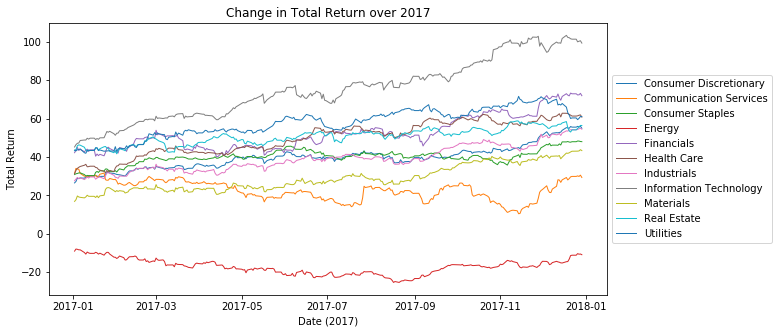

In [128]:
plt.plot(sp1500_2017['Date'],sp1500_2017['Consumer_Discretionary'], linewidth = 1, label = 'Consumer Discretionary' )
plt.plot(sp1500_2017['Date'],sp1500_2017['Communication_Services'], linewidth = 1, label = 'Communication Services')
plt.plot(sp1500_2017['Date'],sp1500_2017['Consumer_Staples'], linewidth = 1, label = 'Consumer Staples')
plt.plot(sp1500_2017['Date'],sp1500_2017['Energy'], linewidth = 1, label = 'Energy')
plt.plot(sp1500_2017['Date'],sp1500_2017['Financials'], linewidth = 1, label = 'Financials')
plt.plot(sp1500_2017['Date'],sp1500_2017['Health_Care'], linewidth = 1, label = 'Health Care')
plt.plot(sp1500_2017['Date'],sp1500_2017['Industrials'], linewidth = 1, label = 'Industrials')
plt.plot(sp1500_2017['Date'],sp1500_2017['Information_Technology'], linewidth = 1, label = 'Information Technology')
plt.plot(sp1500_2017['Date'],sp1500_2017['Materials'], linewidth = 1, label = 'Materials')
plt.plot(sp1500_2017['Date'],sp1500_2017['Real_Estate'], linewidth = 1, label = 'Real Estate')
plt.plot(sp1500_2017['Date'],sp1500_2017['Utilities'], linewidth = 1, label = 'Utilities')



#my titles and labels:

plt.ylabel('Total Return')
plt.xlabel('Date (2017)')
plt.title('Change in Total Return over 2017')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (8,5)
plt.show()

In [111]:
sp1500.columns = ['Date', 'Consumer_Discretionary', 'Communication_Services', 'Consumer_Staples', 
                      'Energy', 'Financials', 'Health_Care', 'Industrials', 'Information_Technology',
                      'Materials', 'Real_Estate', 'Utilities']

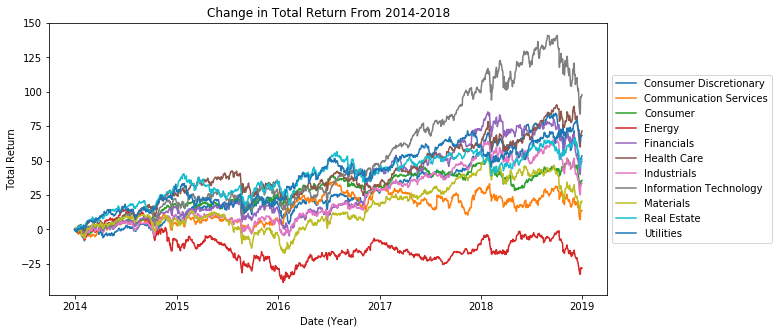

In [125]:
# make the line graph with date as the x axis, total return (industry name) as the y axis, add colors afterward

plt.plot(sp1500['Date'], sp1500['Consumer_Discretionary'], label = 'Consumer Discretionary')
plt.plot(sp1500['Date'], sp1500['Communication_Services'], label = 'Communication Services')
plt.plot(sp1500['Date'], sp1500['Consumer_Staples'], label = 'Consumer')
plt.plot(sp1500['Date'], sp1500['Energy'], label = 'Energy')
plt.plot(sp1500['Date'], sp1500['Financials'], label = 'Financials')
plt.plot(sp1500['Date'], sp1500['Health_Care'], label = 'Health Care')
plt.plot(sp1500['Date'], sp1500['Industrials'], label = 'Industrials')
plt.plot(sp1500['Date'], sp1500['Information_Technology'], label = 'Information Technology')
plt.plot(sp1500['Date'], sp1500['Materials'], label = 'Materials')
plt.plot(sp1500['Date'], sp1500['Real_Estate'], label = 'Real Estate')
plt.plot(sp1500['Date'], sp1500['Utilities'], label = 'Utilities')

plt.legend()
plt.ylabel('Total Return')
plt.xlabel('Date (Year)')
plt.title('Change in Total Return From 2014-2018')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (10,7)
plt.show()